## Code to create undirected simple graphs

## graphs with self loops

In [1]:
import networkx as nx
import numpy as np

In [2]:
path = "D:\\Academics\\Introduction to Data Science\\project\\data\\"

G_init = nx.Graph()
d = {}
for year in range(2009, 2012):
    for month in range(1,13):
        f1 = open(path +str(year)+"\\"+ 'outputs' + str(year) + '_' + str(month) + '.txt', 'r')
        f = open(path +str(year)+"\\"+ 'inputs' + str(year) + '_' + str(month) + '.txt', 'r')
        data = f1.readlines()
        for trnx in data:
            trnx = trnx[:-1].split("\t")
            ind=0
            for i in range(2, len(trnx), 2):
                if G_init.has_edge(trnx[1], trnx[i]):
                    G_init[trnx[1]][trnx[i]]['weight'] += float(trnx[i+1])/10**8
                    d[(trnx[1], str(ind))] = [trnx[i], G_init[trnx[1]][trnx[i]]['weight']]
                else:
                    d[(trnx[1], str(ind))] = [trnx[i], float(trnx[i+1])/10**8]
                    G_init.add_edge(trnx[1], trnx[i], weight = float(trnx[i+1])/10**8)
                ind+=1
        data = f.readlines()
        for trnx in data:
            trnx = trnx[:-1].split("\t")
            in_addr_cost = []
            f=0
            for i in range(2, len(trnx), 2):
                try:
                    in_addr_cost.append(d[(trnx[i], trnx[i+1])])
                except:
                    f=1
            neigh = list(G_init.neighbors(trnx[1]))
            outcost = np.array([G_init[trnx[1]][v]['weight'] for v in neigh])
            if f==1:
                if in_addr_cost == []:
                    in_addr_cost.append(['unknown', sum(outcost)])
                else: 
                    s = sum(map(float, np.array(in_addr_cost)[:,1]))
                    in_addr_cost.append(['unknown', sum(outcost)-s])

            in_addr_cost = np.array(in_addr_cost).transpose()
            s = sum(map(float, list(in_addr_cost[1])))
            in_addr_cost[1] = np.array(list(map(float, in_addr_cost[1])))/s
            G_init.remove_node(trnx[1])
            for i in range(len(in_addr_cost[1])):
                costs = float(in_addr_cost[1][0])*outcost
                for j in range(len(neigh)):
                    if in_addr_cost[0][i]!='noaddress' and in_addr_cost[0][i] !='unknown' and neigh[j]!='noaddress' and neigh[j]!='unknown'and in_addr_cost[0][i] != neigh[j]:
                        if G_init.has_edge(in_addr_cost[0][i], neigh[j]):
                            G_init[in_addr_cost[0][i]][neigh[j]]['weight'] += float(costs[j])
                        else:
                            G_init.add_edge(in_addr_cost[0][i], neigh[j], weight = float(costs[j]))

        if('noaddress' in G_init):
            G_init.remove_node('noaddress')
        if('unknown' in G_init):
            G_init.remove_node('unknown')
        print(G_init.number_of_nodes(), G_init.number_of_edges(), year, month)
        nx.write_graphml(G_init, path + "UG_NSL_NME\\" + str(year) + "_" + str(month) + ".graphml")

2 0 2009 1
8 2 2009 2
8 2 2009 3
12 3 2009 4
19 5 2009 5
21 6 2009 6
24 6 2009 7
25 6 2009 8
25 7 2009 9
30 12 2009 10
35 16 2009 11
51 21 2009 12
67 30 2010 1
105 52 2010 2
145 77 2010 3
3515 6565 2010 4
3744 6923 2010 5
4407 7932 2010 6
21652 33963 2010 7
27572 42832 2010 8
35493 55678 2010 9
44716 72143 2010 10
58543 96499 2010 11
73553 117938 2010 12
102375 169023 2011 1
154531 252704 2011 2
235040 400206 2011 3
320660 582260 2011 4
502030 972097 2011 5
926342 1943509 2011 6
1408276 2905320 2011 7
1784883 3714878 2011 8
2054950 4434945 2011 9
2256466 4952451 2011 10
2443383 5442121 2011 11
2605279 5885991 2011 12


## Graphs with self loops

In [2]:
path = "D:\\Academics\\Introduction to Data Science\\project\\data\\"
nodes = [2, 8, 8, 12, 19, 21, 24, 25, 25, 30, 35, 51, 67, 105, 145, 3515, 3744, 4407, 21652, 27572, 35493, 44716, 58543, 73553,
         102375, 154531, 235040, 320660, 502030, 926342, 1408276, 1784883, 2054950, 2256466, 2443383, 2605279]
edges = [0, 3, 3, 4, 6, 7, 7, 7, 8, 14, 19, 24, 35, 59, 84, 6578, 6941, 7960, 34025, 42918, 55779, 72259, 96643, 118119, 169245, 
        252998, 400591, 582756, 972730, 1944436, 2906598, 3716491, 4436879, 4954600, 5444500, 5888648]
x = []
count = 1
for year in range(2009, 2012):
    for month in range(1,13):
#         x.append(str(year) + "_" + str(month))
        x.append(count)
        count+=1

Text(0, 0.5, 'Number of nodes')

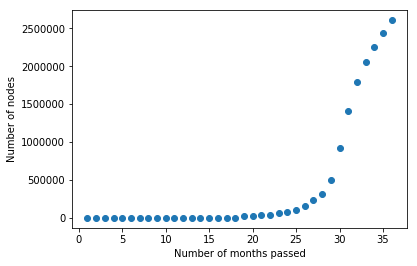

In [3]:
import matplotlib.pyplot as plt
plt.scatter(x, nodes)
plt.xlabel("Number of months passed")
plt.ylabel("Number of nodes")

Text(0, 0.5, 'Number of edges')

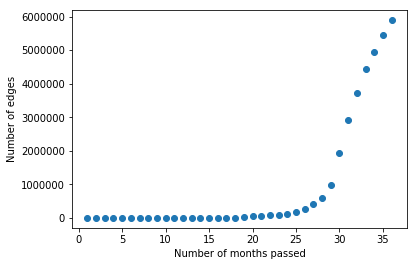

In [4]:
plt.scatter(x, edges)
plt.xlabel("Number of months passed")
plt.ylabel("Number of edges")

## Graphs without self loops

In [4]:
nodes = [2, 8, 8, 12, 19, 21, 24, 25, 25, 30, 35, 51, 67, 105, 145, 3515, 3744, 4407, 21652, 27572, 35493, 44716, 58543, 73553,
         102375, 154531, 235040, 320660, 502030, 926342, 1408276, 1784883, 2054950, 2256466, 2443383, 2605279]
edges = [0, 2, 3, 3, 5, 6, 6, 6, 7, 12, 16, 21, 30, 52, 77, 6565, 6923, 7932, 33963, 42832, 55678, 72143, 96499, 117938, 169023, 
        252704, 400206, 582260, 972097, 1943509, 2905320, 3714878, 4434945, 4952451, 5442121, 5885991]

x = []
count = 1
for year in range(2009, 2012):
    for month in range(1,13):
#         x.append(str(year) + "_" + str(month))
        x.append(count)
        count+=1

Text(0, 0.5, 'Number of nodes')

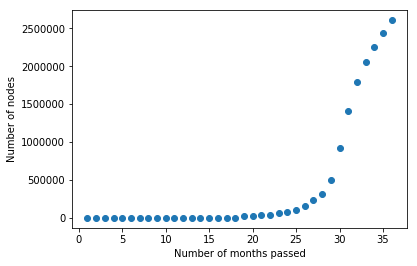

In [7]:
import matplotlib.pyplot as plt
plt.scatter(x, nodes)
plt.xlabel("Number of months passed")
plt.ylabel("Number of nodes")

Text(0, 0.5, 'Number of edges')

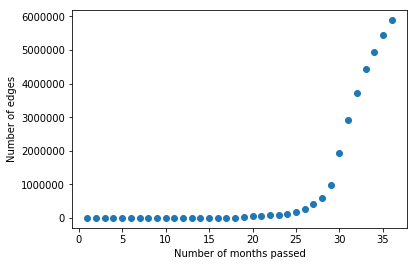

In [6]:
plt.scatter(x, edges)
plt.xlabel("Number of months passed")
plt.ylabel("Number of edges")